# Laboratório #3

### Instruções

1. Quando você terminar os exercícios do laboratório, vá ao menu do Jupyter ou Colab e selecione a opção para fazer download do notebook.
    * Os notebooks tem extensão .ipynb. 
    * Este deve ser o arquivo que você irá entregar.
    * No Jupyter vá até a opção **File** -> **Download as** -> **Notebook (.ipynb)**.
    * No Colab vá até a opção **File** -> **Download .ipynb**.
2. Após o download do notebook, vá até a aba de tarefas do MS Teams, localize a tarefa referente a este laboratório e faça o upload do seu notebook. Veja que há uma opção de anexar arquivos à tarefa.

**Nome**:

**Matrícula**:

## Exercícios

#### 1)  Neste exercício, você irá encontrar a solução ótima para um problema de regressão linear utilizando a versão em mini-batches do algoritmo do gradiente descendente.

Dada a seguinte **função observável**

$$y_{noisy}(n) = y(n) + w(n),$$

onde $w$ é vetor coluna com $N = 1000$ (ou seja, o número de exemplos) valores retirados de uma distribuição aleatória Gaussiana com média 0 e variância igual a 8 e $y$ é a **função objetivo**. Neste exercício, a **função objetivo** (ou **modelo gerador**) é dada por:

$$y(n) = x_1(n) + x_2(n),  $$

onde $x_1$ é um vetor coluna com $N$ valores retirados de uma **distribuição Gaussiana** com média 0 e variância unitária e $x_2$ é outro vetor coluna com $N$ valores retirados de uma **distribuição Gaussiana** com média 0 e variância igual a 4.

A **função hipótese** para este exercício deve ser

$$h(n) = a_1 x_1(n) + a_2 x_2(n).$$

**DICAS**:

+ A biblioteca `numpy` fornece uma função chamada `rand` para geração de valores aleatórios retirados de uma distribuição uniforme. Seu uso é idêntico ao da função `randn`, a qual gera valores retirados de uma distribuição Gaussiana Normal Padrão (ou seja, com média zero e variância unitára). O código abaixo gera um vetor coluna com 100 linhas e 1 coluna com valores retirados de uma distribuição uniforme no intervalo de $0$ a $100$.
```python
import numpy as np
x = 100*np.random.rand(100,1)
```
+ O mesmo pode ser feito para gerar vetores com a função `randn`, para isso, apenas troque `rand` por `randn` no exemplo acima.
+ Para gerar um vetor com valores retirados de uma variável aleatória Gaussiana com variância igual a `var`, multiplique o vetor pela raíz quadrada da variância, por exemplo
```python
x = np.sqrt(var)*np.random.randn(N,1)
```
+ Para resolver as questões 1, 2 e 4 deste exercício, se baseie no código do exemplo da Parte II de regressão linear: [exemplo_regressao_linear_gradiente_descendente.ipynb](https://colab.research.google.com/github/zz4fap/t319_aprendizado_de_maquina/blob/master/notebooks/regression/exemplo_regressao_linear_gradiente_descendente.ipynb).
+ Não se esqueça de importar as bibliotecas necessárias. Veja o exemplo.

De posse destas informações, faça o seguinte:

1. Gere e plote a **função observável**, $y_{noisy}$, em função dos atributos $x_1$ e $x_2$. Note que este será um gráfico 3D.

In [1]:
# Digite aqui o código do exercício.

2. Plote a **superfície de erro**. Note que este será um gráfico 3D.

**DICAS**: 

+ Use a função `calculateErrorSurface` do exemplo para calcular os valores necessários para plotar a superfície de erro.

+ Para plotar a superfície de erro, faça $a_1$ e $a_2$ variarem de $-4$ até $6$. Altere esses valores na definição da função `calculateErrorSurface`.

In [6]:
# Digite aqui o código do exercício.

3. Explique porque a superfície de erro tem a forma de um `U`.

**Dica**: Leia o slide `Formatos diferentes para a superfície de erro` da parte I sobre regressão linear.

<span style="color:blue">Digite aqui as respostas do exercício.</span>

4. Encontre a solução ótima para este problema de regressão linear utilizando a **equação normal**. Em seguida, imprima os valores encontrados para os **pesos**, $a_1$ e $a_2$, e o valor do **erro quadrátio médio**.

**DICA**
+ Use a função `calculateClosedFormSolution` do exemplo.

In [7]:
# Digite aqui o código do exercício.

5. Execute a célula abaixo, analise o código e os resultados mostrados nas 2 figuras. Neste exercício, utilizamos a versão em mini-batches do gradiente descendente (GD), a qual é implementada pela função `gradientDescentMiniBatch` abaixo.

**DICA**:
+ Para que o código da célula abaixo funcione corretamente, é necessário que você tenha resolvido as questões anteriores.

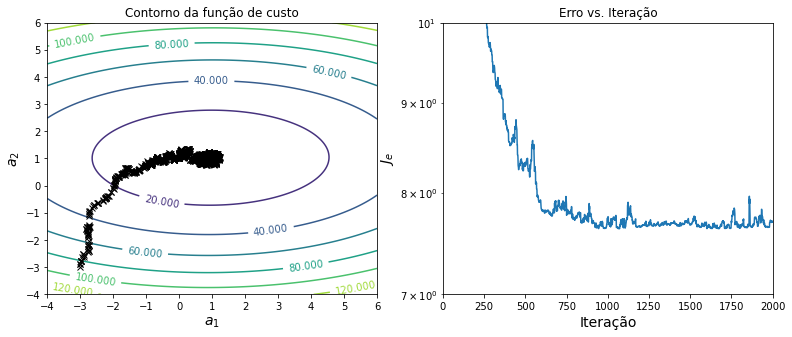

In [4]:
import random

def gradientDescentMiniBatch(X, y_noisy, alpha, n_epochs, N, mb_size):
    '''
    Função que implementa o algoritmo do gradiente descendente em mini-batches.
    Parâmetros de entrada:
       X: matriz de atributos
       y_noisy: vetor de rótulos (ou valores esperados)
       alpha: passo de aprendizagem
       n_epochs: número máximo de épocas
       N: número de exemplos do conjunto de treinamento
       mb_size: tamanho do mini-batch
    '''
    # Random initialization of parameters.
    a = np.array([-3.0, -3.0]).reshape(2, 1)

    # Create vector for parameter history.
    a_hist = np.zeros((2, n_epochs*(N//mb_size)+1))
    # Initialize history vector.
    a_hist[:, 0] = a.reshape(2,)

    # Create array for storing error values.
    Jgd = np.zeros(n_epochs*(N//mb_size)+1)

    Jgd[0] = (1.0/N)*sum(np.power(y_noisy - X.dot(a), 2))

    # Create array for storing gradient values.
    grad_hist = np.zeros((2, n_epochs*(N//mb_size)))

    # Mini-batch gradient-descent loop.
    inc = 0
    for e in range(n_epochs):

        # Shuffle the whole dataset before every epoch.
        shuffled_data_set_indexes = random.sample(range(0, N), N)

        for i in range(0, N//mb_size):

            start = i*mb_size
            end = mb_size*(i+1)
            batch_indexes = shuffled_data_set_indexes[start:end]

            xi = X[batch_indexes]
            yi = y_noisy[batch_indexes]

            gradients = -(2.0/mb_size)*xi.T.dot(yi - xi.dot(a))
            a = a - alpha*gradients

            Jgd[inc+1] = (1.0/N)*sum(np.power((y_noisy - X.dot(a)), 2))

            grad_hist[:, inc] = gradients.reshape(2,)
            a_hist[:, inc+1] = a.reshape(2,)

            inc = inc + 1
            
    return a, Jgd, a_hist, grad_hist, inc

# Number of epochs.
n_epochs = 2
# Learning rate.
alpha = 0.002
# Mini-batch size.
mb_size = 1

# Call function that implements the mini-batch.
a, Jgd, a_hist, grad_hist, inc = gradientDescentMiniBatch(X, y_noisy, alpha, n_epochs, N, mb_size)

# Plot contour figure.        
fig = plt.figure(figsize=(13,5))

ax1 = fig.add_subplot(121)
cp = plt.contour(A1, A2, J)
ax1.clabel(cp, inline=1, fontsize=10)
ax1.set_xlabel('$a_1$', fontsize=14)
ax1.set_ylabel('$a_2$', fontsize=14)
ax1.set_title('Contorno da função de custo')
ax1.plot(a_opt[0], a_opt[1], c='r', marker='*')
ax1.plot(a_hist[0, 0:inc+1], a_hist[1, 0:inc+1], 'kx')
ax1.set_xticks(np.arange(-4, 7, step=1.0))
ax1.set_yticks(np.arange(-4, 7, step=1.0))

ax2 = fig.add_subplot(122)
ax2.plot(np.arange(0, inc+1), Jgd[0:inc+1])
ax2.set_xlim((0, inc+1))
ax2.set_ylim((7, 10))
ax2.set_yscale('log')
ax2.set_xlabel('Iteração', fontsize=14)
ax2.set_ylabel('$J_e$', fontsize=14)
ax2.set_title('Erro vs. Iteração')

plt.show()

Após analisar os resultados, responda:

1. Lembrando-se que o GD em mini-batches pode ser visto como uma generalização do GD em batelada e estocástico, diga qual é a versão sendo usada neste exercício. Qual parâmetro você observou para chegar a esta conclusão? (**Dica**: Leia o slide 13 da parte II de regressão linear.)
2. O algoritmo converge de forma estável para o mínimo da função de erro?
3. Por que o algoritmo tem esse comportamento?
4. O que pode ser feito para melhorar este comportamento? (**Dica**: Existem 2 formas de melhorar o comportamento. Uma delas aumenta o tempo de treinamento e a outra não).

<span style="color:blue">Digite abaixo as respostas do exercício.</span>

6. Execute a célula abaixo, analise o código e os resultados mostrados nas 2 figuras. Neste exercício, utilizamos novamente a versão em mini-batches do gradiente descendente (GD), a qual é implementada pela função `gradientDescentMiniBatch`.

**DICA**:
+ Para que o código da célula abaixo funcione corretamente, é necessário que você tenha resolvido as questões anteriores.

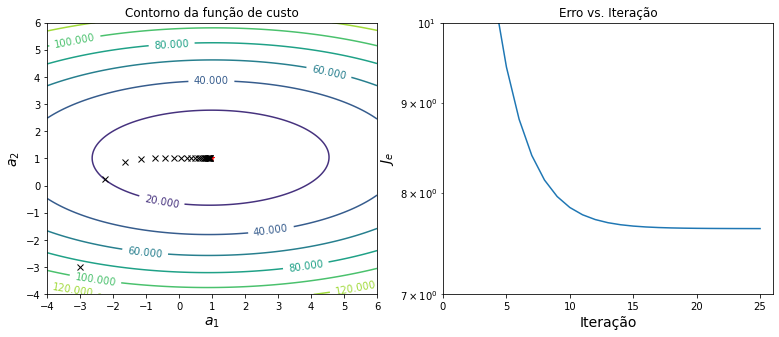

In [5]:
# Number of epochs.
n_epochs = 25
# Learning rate.
alpha = 0.1
# Mini-batch size.
mb_size = 1000

# Call function that implements the mini-batch.
a, Jgd, a_hist, grad_hist, inc = gradientDescentMiniBatch(X, y_noisy, alpha, n_epochs, N, mb_size)

# Plot contour figure.        
fig = plt.figure(figsize=(13,5))

ax1 = fig.add_subplot(121)
cp = plt.contour(A1, A2, J)
ax1.clabel(cp, inline=1, fontsize=10)
ax1.set_xlabel('$a_1$', fontsize=14)
ax1.set_ylabel('$a_2$', fontsize=14)
ax1.set_title('Contorno da função de custo')
ax1.plot(a_opt[0], a_opt[1], c='r', marker='*')
ax1.plot(a_hist[0, 0:inc+1], a_hist[1, 0:inc+1], 'kx')
ax1.set_xticks(np.arange(-4, 7, step=1.0))
ax1.set_yticks(np.arange(-4, 7, step=1.0))

ax2 = fig.add_subplot(122)
ax2.plot(np.arange(0, inc+1), Jgd[0:inc+1])
ax2.set_xlim((0, inc+1))
ax2.set_ylim((7, 10))
ax2.set_yscale('log')
ax2.set_xlabel('Iteração', fontsize=14)
ax2.set_ylabel('$J_e$', fontsize=14)
ax2.set_title('Erro vs. Iteração')

plt.show()

Após analisar os resultados, responda:

1. Lembrando-se que o GD em mini-batches pode ser visto como uma generalização do GD em batelada e estocástico, diga qual é a versão sendo usada neste exercício. Qual parâmetro você observou para chegar a esta conclusão? (**Dica**: o conjunto de treinamento tem 1000 exemplos.) 
2. O algoritmo converge de forma estável para o mínimo da função de erro?
3. Por que o algoritmo tem esse comportamento?
4. Cite uma desvantagem desta versão do GD.

<span style="color:blue">Digite abaixo as respostas do exercício.</span>

#### 2) Neste exercício, você irá usar a classe `SGDRegressor` da biblioteca SciKit-Learn para resolver um problema de regressão linear. 

+ A biblioteca Scikit-Learn disponibiliza a classe `SGDRegressor` para realizar regressão linear utilizando o Gradiente Descendente Estocástico.
+ A classe possui vários parâmetros que podem ser configurados (e.g., tipo de função de erro, esquema de variação do passo de aprendizagem, etc.).

O link abaixo contém a versão mais recente da documentação da classe `SGDRegressor`. Antes de resolver o exercício, leia a documentação. 

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html

**DICA**: 
* Use o exemplo [SGD_with_scikit_learn_lib.ipynb](https://colab.research.google.com/github/zz4fap/t319_aprendizado_de_maquina/blob/master/notebooks/regression/gd_versions/SGD_with_scikit_learn_lib.ipynb) como modelo para resolução deste exercício.

Em seguida, faça o seguinte:

1. Analise e execute o trecho de código abaixo para gerar o conjunto de treinamento.

**DICAS**
+ Analise como o atributo é gerado.
+ Analise o modelo gerador, perceba que ele é a equação de uma reta.

In [3]:
import numpy as np
import random

# Número de exemplos.
N = 1000

# Atributo.
x1 = np.random.randn(N, 1)

# Ruído.
w = np.random.randn(N, 1)

# Modelo gerador.
y = 2 + 4*x1

# Função observável.
y_noisy = y + w

2. Crie um gráfico comparando as versões original e ruidosa do modelo gerador.

**DICAS**
+ Se baseie no código do exemplo [error_surface_example1.ipynb](https://colab.research.google.com/github/zz4fap/t319_aprendizado_de_maquina/blob/master/notebooks/regression/error_surface_example1.ipynb) para criar o gráfico solicitado. 
+ Não se esqueça de importar a biblioteca `Matplotlib`.

In [4]:
# Escreva o código aqui.

3. Na célula abaixo, **importe** a classe `SGDRegressor` e instancie um objeto desta classe.

In [5]:
# Escreva o código aqui.

4. Treine o modelo de regressão linear utilizando o método `fit` do objeto da classe `SGDRegressor`.

In [6]:
# Escreva o código aqui.

5. De posse do modelo treinado, use o método `predict` para prever os valores de saída do modelo usando como entrada o vetor de atributo `x1`. Armazene, ou seja, atribua, o resultado da predição em uma variável.

**DICA**:
+ O vetor `x1` foi gerado no item 1 do exercício.

In [7]:
# Escreva o código aqui.

6. Usando os valores esperados, ou seja, `y_noisy`, e os valores de saída do modelo de regressão linear, ou seja, o resultado da predição feita no item anterior, calcule e imprima o erro quadrático médio.

In [8]:
# Escreva o código aqui.

7. Imprima os valores dos pesos do modelo obtidos com o treinamento através do gradiente descendente estocástico.

**DICAS**
+ Perceba que o modelo gerador, usado no item 1 deste exercício para gerar os dados de treinamento, possui o peso de *bias* ou *intercept*, `a0`. Portanto, para acessar o valor deste peso, você precisa usar o atributo `intercept_` do objeto da classe `SGDRegressor`. 
+ O peso `a1`, aquele associado ao atributo `x1`, é acessado através do primeiro elemento do atributo `coef_`.

In [9]:
# Escreva o código aqui.

8. Crie um gráfico comparando os valores originais, ruidosos e gerados pelo modelo de regressão linear obtido com o gradiente descendente estocástico.

**DICA**
+ Para gerar este gráfico, use o código do item 2 acrescentando o plot dos valores obtidos com a predição feita no item 5.

In [10]:
# Escreva o código aqui.